# PR

## imports

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import os

In [0]:
%%time
PRv_df = pd.DataFrame()
for i,tmp_df in enumerate(pd.read_csv("drive/My Drive/voltages_AP_30sek_sample.csv",header=None,engine='python',chunksize=50000)):
  PRv_df = pd.concat([PRv_df,tmp_df],axis=0)


CPU times: user 1min 39s, sys: 9.59 s, total: 1min 49s
Wall time: 2min


In [0]:
%%time
PRss_df = pd.read_csv("drive/My Drive/para_comb_20p_sample.csv",header=None,engine='python')
print(PRss_df.shape)
print(PRss_df.size)

(100000, 13)
1300000
CPU times: user 1.08 s, sys: 62.3 ms, total: 1.15 s
Wall time: 2.08 s


In [0]:
names = ['Cm','gL','gNa','EL','eNa','EK','gc','gkdr','gAHP','gC','gCa','ECa','p']
PRv = PRv_df.values
PRss = PRss_df.values

In [0]:
PRss_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.999513,0.000100,0.029999,-60.023932,49.984971,-75.074638,2.099833,0.014993,0.000800,0.015006,0.010003,80.072709,0.499848
std,0.346988,0.000012,0.003462,6.906759,5.774051,8.679948,0.242867,0.001735,0.000092,0.001733,0.001153,9.244658,0.057802
min,2.400023,0.000080,0.024000,-71.999638,40.000048,-89.999176,1.680013,0.012000,0.000640,0.012000,0.008000,64.000175,0.400001
25%,2.697940,0.000090,0.027014,-65.975249,44.974190,-82.625309,1.888724,0.013490,0.000720,0.013512,0.009008,72.085135,0.449931
50%,2.998963,0.000100,0.029982,-60.044432,49.987087,-75.092556,2.101325,0.014988,0.000800,0.015000,0.010004,80.099013,0.499631
75%,3.299588,0.000110,0.033013,-54.052880,54.984041,-67.541063,2.309414,0.016498,0.000880,0.016512,0.011001,88.068443,0.549909
max,3.599994,0.000120,0.036000,-48.000154,59.999527,-60.000225,2.519995,0.018000,0.000960,0.018000,0.012000,95.999927,0.599998


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mn
from sklearn.metrics import r2_score,mean_squared_error
import plotly

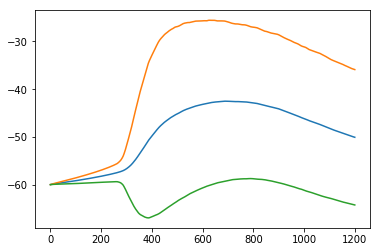

In [0]:
plt.plot(np.mean(PRv,axis=0))
plt.plot(np.mean(PRv,axis=0) + np.std(PRv,axis=0))
plt.plot(np.mean(PRv,axis=0) - np.std(PRv,axis=0))

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as mn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

In [0]:
import keras
from keras import Sequential
from keras.layers import SimpleRNN
from keras import models
from keras import layers

Using TensorFlow backend.


## Standardize and scale

In [0]:
X_Train, X_test, y_Train, y_test = train_test_split(PRss,PRv,test_size=0.3,random_state=111)

In [0]:
scx = StandardScaler()
scy = StandardScaler()


X_Train = scx.fit_transform(X_Train)
y_Train = scy.fit_transform(y_Train)

X_test = scx.transform(X_test)
y_test = scy.transform(y_test)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_Train,y_Train,test_size=0.2,random_state=1234)

In [0]:
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
  
  

## Model 4

In [0]:
model4 = models.Sequential()
model4.add(layers.Dense(24, activation='relu', input_shape=(X_Train.shape[1],)))
model4.add(layers.Dense(60, activation='relu'))
model4.add(layers.Dense(120, activation='relu'))
model4.add(layers.Dense(120, activation='relu'))
model4.add(layers.Dense(y_Train.shape[1]))
model4.compile(optimizer='adam', loss='mse', metrics=[r_square])

In [0]:
%%time
history4_1 = model4.fit(X_Train, y_Train,
                  epochs=4000,
                  batch_size=128*8,
                  verbose=0,
                  validation_data=(X_val, y_val))

CPU times: user 52min 31s, sys: 10min 46s, total: 1h 3min 17s
Wall time: 59min 32s


In [0]:
ypred4 = model4.predict(X_test)
print(r2_score(y_test,ypred4))

0.9631941868838799


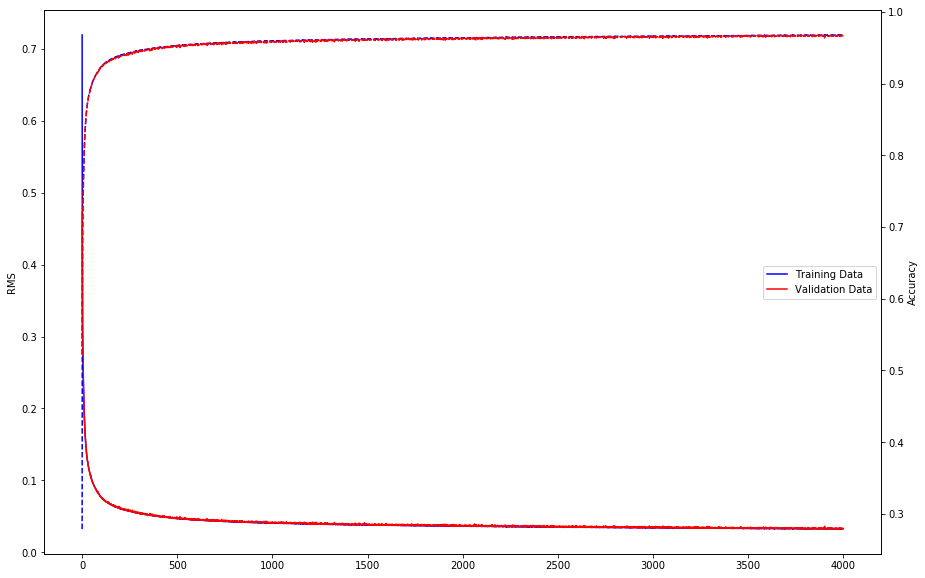

In [0]:
plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(history4_1.history['loss'],label='Training Data',c='blue')
ax.plot(history4_1.history['val_loss'],label='Validation Data',c='red')
plt.ylabel('RMS')
plt.legend(loc='center right')

ax2 = ax.twinx()
ax2.plot(history4_1.history['r_square'],'--',c='blue')
ax2.plot(history4_1.history['val_r_square'],'--',c='red')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.savefig("drive/My Drive/Figures/R2plots/PRclassical_training")

In [0]:
ypred4 = model4.predict(X_test)
print(r2_score(y_test,ypred4))

0.9585172412924856


# test model

In [0]:
X_Train, X_test, y_Train, y_test = train_test_split(PRss,PRv,test_size=0.3,random_state=111)
scx = StandardScaler()
scy = StandardScaler()


X_Train = scx.fit_transform(X_Train)
y_Train = scy.fit_transform(y_Train)

X_test = scx.transform(X_test)
y_test = scy.transform(y_test)

In [0]:
model2 = models.Sequential()
model2.add(layers.Dense(24, activation='relu', input_shape=(X_Train.shape[1],)))
model2.add(layers.Dense(60, activation='relu'))
model2.add(layers.Dense(120, activation='relu'))
model2.add(layers.Dense(120, activation='relu'))
model2.add(layers.Dense(y_Train.shape[1]))
model2.compile(optimizer='adam', loss='mse', metrics=[r_square])

In [0]:
%%time
history2 = model2.fit(X_Train, y_Train,
                  epochs=2000,
                  batch_size=128*8,
                  verbose=0,
                  validation_data=(X_val, y_val))

CPU times: user 26min 57s, sys: 1min 43s, total: 28min 40s
Wall time: 29min 33s


In [0]:
ypred2 = model2.predict(X_test)
print(r2_score(y_test,ypred2))

0.9607870696582613


## Centralized permuted feature importance

In [0]:
from scipy.signal import find_peaks
from scipy.signal import peak_widths
import numpy as np

def first_peak(X,aplimit=-20):
  t_amp = []
  for x in X:
    peaks,_ = find_peaks(x,height=aplimit)
    if len(peaks)>0:
      t_amp.append(peaks[0])
    else:
      t_amp.append(np.nan)
  return np.array(t_amp)

In [0]:
from copy import copy
from scipy.signal import find_peaks
from scipy.signal import peak_widths

def center_by_ap_mod(yhat,ytrue):
  
  y = copy(ytrue)

  centered_yhat = []
  AP_samples = []
  centered_y = []

  #Enumerate over the unscaled predicted voltages.
  np.warnings.filterwarnings('ignore')
  amp_yhat = first_peak(scy.inverse_transform(yhat))
  i1 = (amp_yhat <= 1001) & (amp_yhat >= 200)  #Indexes with AP in range 200-1001

  amp_y = first_peak(scy.inverse_transform(y))
  i2 = (amp_y <= 1001) & (amp_y >= 200)
  i3 = i1*i2

  centered_yhat = [cyhat[int(t)-200:int(t)+200] for t,cyhat in zip(amp_yhat[i3],yhat[i3,:])]
  centered_y = [cy[int(t)-200:int(t)+200] for t,cy in zip(amp_y[i3],y[i3,:])]
    
  return i3, np.array(centered_yhat),np.array(centered_y)

In [0]:
def centralized_permuted_features_importance(_X,y,model,seeds=[234]):
  
  CPFI = np.zeros((len(seeds),13,400)) #Empty array to hold CPFI.
  
  base_yhat = model.predict(_X) #Create prediction of voltage
  
  AP_ind,centered_yhat,centered_y = center_by_ap_mod(base_yhat,y)
  
  base_line = np.array([mean_squared_error(centered_y[:,c],centered_yhat[:,c]) for c in range(centered_y.shape[1])])
  
  
  for i,seed in enumerate(seeds):
    np.random.RandomState(seed) # Set random seed
    for j in range(_X.shape[1]): # Iterate all columns
    
      X = copy(_X[AP_ind,:]) # Copy the original X with samples that have AP.
      X[:,j] = np.random.permutation(X[:,j]) # Permute column j.
      perm_yhat = model.predict(X) # Predict yhat of permuted
      perm_AP_ind,perm_centered_yhat,perm_centered_y = center_by_ap_mod(perm_yhat,y[AP_ind,:])
      
      # Calculate the error between the permuted yhat and y
      perm_error = np.array(
          [mean_squared_error(perm_centered_y[:,c],perm_centered_yhat[:,c])
           for c in range(perm_centered_yhat.shape[1])])
      
      #Calculate the Feature importance of permuted variable
      FI_perm = perm_error - base_line
      
      CPFI[i,j,:] = FI_perm # Add to CPFI
      
      
      
  return CPFI

In [0]:
def CPFI_plotter(CPFI,names,save=False,filename=None):
  plt.style.use('default')

  plt.figure(figsize=(15,70))

  x_array = [f for f in range(CPFI.shape[2])]
  before = [round(-i*0.025,3) if i%25 == 0 else '' for i in reversed(range(200))]
  before.extend([round(i*0.025,3) if i%25 == 0 else '' for i in range(1,201)])
  
  
  for i in range(CPFI.shape[1]):

    plt.subplot(CPFI.shape[1],1,i+1);
    plt.vlines(x_array[200], -0.5, 3, colors='k', linestyles='--',alpha =0.3)
    

    # Calculate min and max values of CPFI for each variable
    sen_max = np.max(CPFI[:,i,:],axis=0)
    sen_min = np.min(CPFI[:,i,:],axis=0)
    plt.fill_between(x_array,sen_max,sen_min) ;



    # Calculate mean and std values of CPFI for each variable
    mu = np.mean(CPFI[:,i,:],axis=0)
    std = np.std(CPFI[:,i,:],axis=0)
    
    upper = mu+std
    lower = mu-std

    plt.fill_between(x_array,lower,upper,facecolor='lightblue',label=names[i]) ;


    plt.plot(mu,c='r',linewidth=0.2);
    plt.ylim((np.min(CPFI)-0.5,np.max(CPFI)+0.5))
    plt.xticks(x_array, before);



    plt.legend(loc='right')
    
  if save:
    if filename:
      plt.savefig("drive/My Drive/Figures/"+filename)
    else:
      print("enter filename")

In [0]:
import seaborn as sns
def CPFI_plotter_same(CPFI,names,save=False,filename=None):
  plt.style.use('default')
  
  colors = sns.color_palette("Paired", len(names))

  fig = plt.figure(figsize=(15,8))

  x_array = [f for f in range(CPFI.shape[2])]
  before = [round(-i*0.025,3) if i%25 == 0 else '' for i in reversed(range(200))]
  before.extend([round(i*0.025,3) if i%25 == 0 else '' for i in range(1,201)])
  
  ax = fig.add_subplot(111)
  ax.set_prop_cycle('color', colors)
  plt.vlines(x_array[200], -0.5, 3, colors='k', linestyles='--',alpha =0.3)
  
  for i in range(CPFI.shape[1]):
    
    color = next(ax._get_lines.prop_cycler)['color']


    # Calculate min and max values of CPFI for each variable
    sen_max = np.max(CPFI[:,i,:],axis=0)
    sen_min = np.min(CPFI[:,i,:],axis=0)
    plt.fill_between(x_array,sen_max,sen_min,facecolor=color,alpha=0.2) ;



    # Calculate mean and std values of CPFI for each variable
    mu = np.mean(CPFI[:,i,:],axis=0)
    std = np.std(CPFI[:,i,:],axis=0)
    
    upper = mu+std
    lower = mu-std

    plt.fill_between(x_array,lower,upper,facecolor=color,alpha=0.5) ;

    if i < 10:
      plt.plot(mu,'-',c=color,linewidth=1,label=names[i]);
    else:
      plt.plot(mu,'--',c=color,linewidth=1,label=names[i]);
    plt.ylim((np.min(CPFI)-0.5,np.max(CPFI)+0.5))
    plt.xticks(x_array, before);


    plt.legend()
    
  if save:
    if filename:
      plt.savefig("drive/My Drive/Figures/"+filename)
    else:
      print("enter filename")

In [0]:
%%time
seeds = [i*123 for i in range(1,4)]
CPFI = centralized_permuted_features_importance(X_test,y_test,model4,seeds)

CPU times: user 2min 9s, sys: 5.79 s, total: 2min 15s
Wall time: 2min 2s


In [0]:
CPFI_plotter(CPFI,names,save=False,filename='model8_PR_CPFI_multiple4.png')

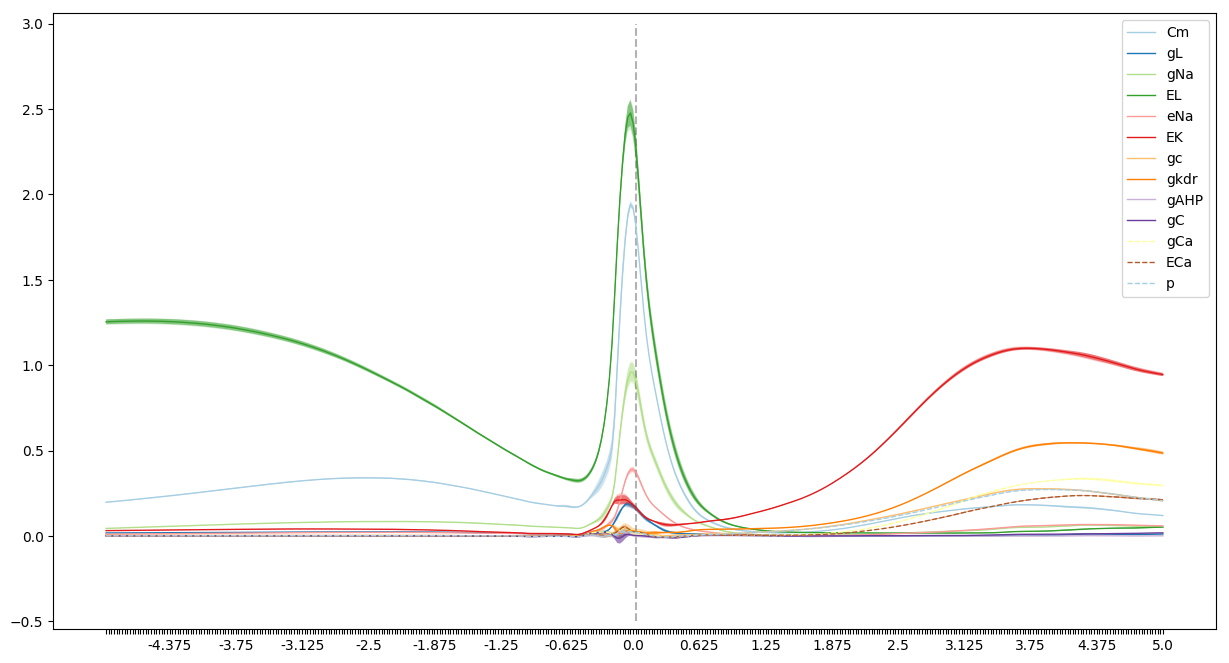

In [0]:
CPFI_plotter_same(CPFI,names,save=True,filename='PR_CPFI.png')

## Permuted feature importance

In [0]:
from scipy.signal import find_peaks
from scipy.signal import peak_widths


def aggregated_features(X,aplimit=-20):
  action_potentials = []
  ap_amps = []
  widths = []
  widths_plotting = []

  for x in X:
    peaks,d = find_peaks(x, height=aplimit)
    if len(peaks)>0:
      ap_amps.append(d['peak_heights'])
    else:
      ap_amps.append(np.array([]))

    results_half = peak_widths(x, peaks, rel_height=0.5)
    widths.append(results_half[0])  # widths
    widths_plotting.append(results_half[1:])
    
    
    action_potentials.append(peaks)
  return np.array(action_potentials),np.array(ap_amps),np.array(widths),np.array(widths_plotting)

In [0]:
def PFI_plotter_same(PFI,names,ap_times,save=False,filename=None):

  first_aptime = np.array([prap[0] if len(prap)>0 else np.nan for prap in ap_times])*0.025
  second_aptime = np.array([prap[1] if len(prap)>1 else np.nan for prap in ap_times])*0.025
  third_aptime = np.array([prap[2] if len(prap)>2 else np.nan for prap in ap_times])*0.025
  
  
  colors = sns.color_palette("Paired", len(names))

  fig = plt.figure(figsize=(15,10))
  ax = fig.add_subplot(111)
  ax.set_prop_cycle('color', colors)
  
  x_array = [f*0.025 for f in range(PFI.shape[2])]
  plt.hist(first_aptime, weights=np.ones_like(first_aptime)/1000,bins=60,alpha=0.2)
  plt.hist(second_aptime, weights=np.ones_like(second_aptime)/500,bins=60,alpha=0.2)
  plt.hist(third_aptime, weights=np.ones_like(third_aptime)/500,bins=60,alpha=0.2)
  
  
  for i in range(PFI.shape[1]):
    
    color = next(ax._get_lines.prop_cycler)['color']


    # Calculate min and max values of PFI for each variable
    sen_max = np.max(PFI[:,i,:],axis=0)
    sen_min = np.min(PFI[:,i,:],axis=0)
    plt.fill_between(x_array,sen_max,sen_min,facecolor=color,alpha=0.2) ;



    # Calculate mean and std values of PFI for each variable
    mu = np.mean(PFI[:,i,:],axis=0)
    std = np.std(PFI[:,i,:],axis=0)
    
    upper = mu+std
    lower = mu-std

    plt.fill_between(x_array,lower,upper,facecolor=color,alpha=0.5);

    if i < 10:
      plt.plot(x_array,mu,'-',c=color,linewidth=1,label=names[i]);
    else:
      plt.plot(x_array,mu,'--',c=color,linewidth=1,label=names[i]);
      
    plt.ylim((np.min(PFI)-0.5,np.max(PFI)+0.5))
    

    
    


    plt.legend()
  
  if save:
    if filename:
      plt.savefig("drive/My Drive/Figures/"+filename)
    else:
      print("enter filename")


In [0]:
def PFI_plotter(PFI,names,ap_times,save=False,filename='None'):

  plt.figure(figsize=(15,80))
  first_aptime = np.array([prap[0] if len(prap)>0 else np.nan for prap in ap_times])*0.025
  second_aptime = np.array([prap[1] if len(prap)>1 else np.nan for prap in ap_times])*0.025
  third_aptime = np.array([prap[2] if len(prap)>2 else np.nan for prap in ap_times])*0.025
  

  x_array = [f*0.025 for f in range(PFI.shape[2])]
  for i in range(PFI.shape[1]):
    

    plt.subplot(PFI.shape[1],1,i+1);

    # Calculate min and max values of PFI for each variable
    sen_max = np.max(PFI[:,i,:],axis=0)
    sen_min = np.min(PFI[:,i,:],axis=0)
    plt.fill_between(x_array,sen_max,sen_min) ;



    # Calculate mean and std values of PFI for each variable
    mu = np.mean(PFI[:,i,:],axis=0)
    std = np.std(PFI[:,i,:],axis=0)
    
    upper = mu+std
    lower = mu-std

    plt.fill_between(x_array,lower,upper,facecolor='lightblue',label=names[i]) ;

    if i < 10:
      plt.plot(x_array,'-',mu,c='r',linewidth=2);
    else:
      plt.plot(x_array,'--',mu,c='r',linewidth=2);
      
    plt.ylim((np.min(PFI)-0.5,np.max(PFI)+0.5))
    plt.hist(first_aptime, weights=np.ones_like(first_aptime)/1000,bins=60,alpha=0.2)
    plt.hist(second_aptime, weights=np.ones_like(second_aptime)/1000,bins=60,alpha=0.2)
    plt.hist(third_aptime, weights=np.ones_like(second_aptime)/1000,bins=60,alpha=0.2)
    
    
    


    plt.legend(loc='right')
    
  if save:
    if filename:
      plt.savefig("drive/My Drive/Figures/"+filename)
    else:
      print("enter filename")

In [0]:
from copy import copy

def Permuted_feature_impotance(_X,y,model,seeds=[234]):
  
  base_yhat = model.predict(_X)
  base_line = np.array(
      [mean_squared_error(y[:,c],base_yhat[:,c])
       for c in range(base_yhat.shape[1])])
  
  PFI = np.zeros((len(seeds),_X.shape[1],y.shape[1]))
  
  for i,seed in enumerate(seeds):
    
    np.random.RandomState(seed) # Sets the random state for numpy
    for j in range(X_test.shape[1]):
      
      X = copy(_X)
      X[:,j] = np.random.permutation(X[:,j])

      perm_yhat = model.predict(X)
      
      perm_error = np.array(
          [mean_squared_error(y[:,c],perm_yhat[:,c])
           for c in range(perm_yhat.shape[1])])
      
      



      FI_perm = np.array([mean_squared_error(y[:,c],perm_yhat[:,c]) for c in range(perm_yhat.shape[1])])
      PFI[i,j,:] = FI_perm - base_line
  
  return PFI


In [0]:
ap_times,amp,w,wp = aggregated_features(scy.inverse_transform(y_test))

In [0]:
%%time
seeds = [123*i for i in range(1,4)]
PFI = Permuted_feature_impotance(X_test,y_test,model4,seeds)

CPU times: user 3min 34s, sys: 6.62 s, total: 3min 41s
Wall time: 3min 24s


In [0]:
PFI_plotter(PFI,names,ap_times,save=False,filename='model8_PR_PFI_multiple4.png')

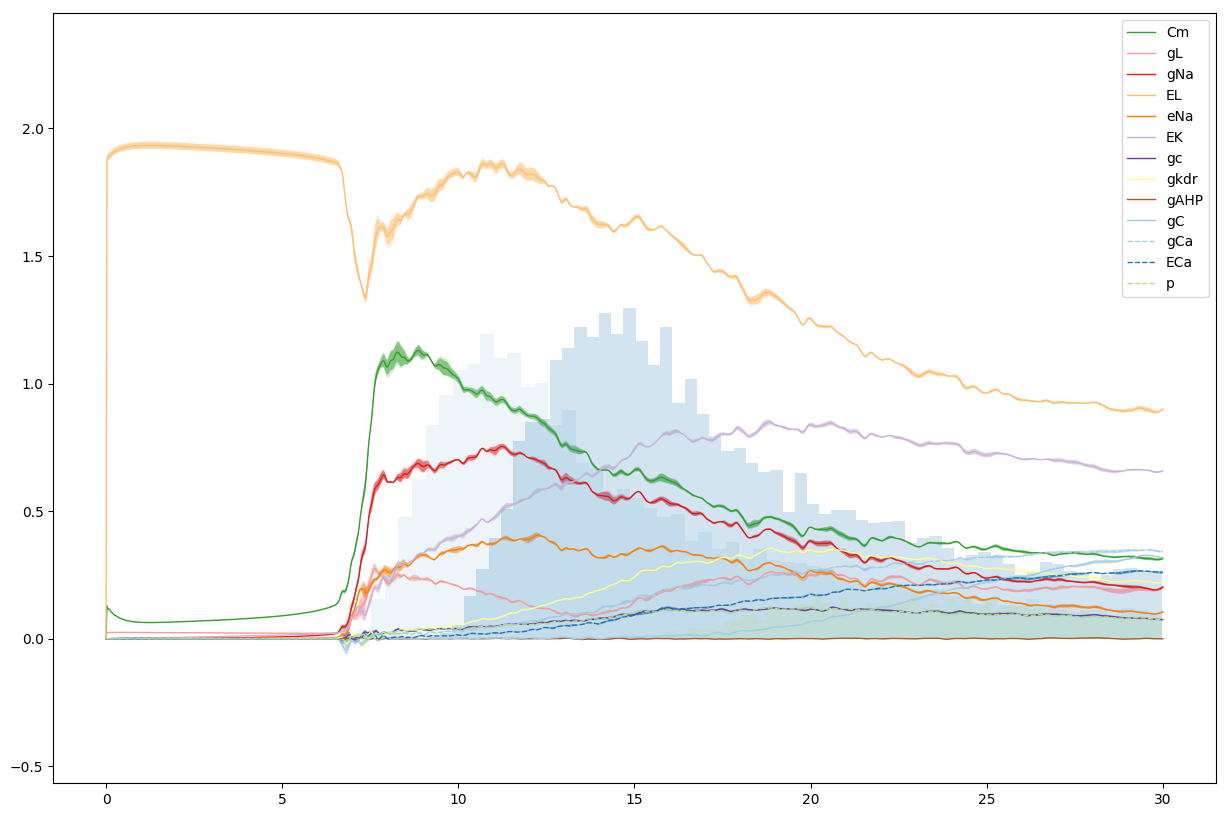

In [0]:
PFI_plotter_same(PFI,names,ap_times,save=True,filename='PRPFI.png')